In [1]:
###context and column definition can be found in https://www.kaggle.com/datasets/mariotormo/complete-pokemon-dataset-updated-090420

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns
import matplotlib

In [3]:
data=pd.read_csv("pokedex.csv",index_col=0)

In [4]:
data.head()

,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,NaN,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [5]:
data=data.reset_index()

# Numeric Features Correlations

In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

only_numeric = data.select_dtypes(include=numerics)

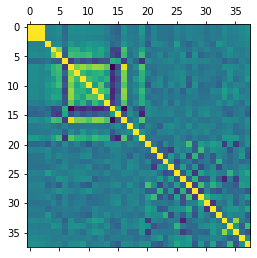

In [7]:
plt.matshow(only_numeric.corr())
plt.show()

In [8]:
cor_matrix = only_numeric.corr().abs() 
upper_tri=cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

/var/folders/l6/4yw4bzbs5976jrcjtmdprn4m0000gr/T/ipykernel_80419/905670342.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri=cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [9]:
## features with correlation greater than 0.85
[column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]

['pokedex_number', 'generation', 'base_experience']

In [10]:
print(only_numeric.columns)

Index(['index', 'pokedex_number', 'generation', 'type_number', 'height_m',
       'weight_kg', 'abilities_number', 'total_points', 'hp', 'attack',
       'defense', 'sp_attack', 'sp_defense', 'speed', 'catch_rate',
       'base_friendship', 'base_experience', 'egg_type_number',
       'percentage_male', 'egg_cycles', 'against_normal', 'against_fire',
       'against_water', 'against_electric', 'against_grass', 'against_ice',
       'against_fight', 'against_poison', 'against_ground', 'against_flying',
       'against_psychic', 'against_bug', 'against_rock', 'against_ghost',
       'against_dragon', 'against_dark', 'against_steel', 'against_fairy'],
      dtype='object')


# Check Missing Values

In [11]:
data.isna().sum()

index                 0
pokedex_number        0
name                  0
german_name          90
japanese_name        90
generation            0
status                0
species               0
type_number           0
type_1                0
type_2              486
height_m              0
weight_kg             1
abilities_number      0
ability_1             3
ability_2           515
ability_hidden      218
total_points          0
hp                    0
attack                0
defense               0
sp_attack             0
sp_defense            0
speed                 0
catch_rate          104
base_friendship     104
base_experience     104
growth_rate           1
egg_type_number       0
egg_type_1            3
egg_type_2          746
percentage_male     236
egg_cycles            1
against_normal        0
against_fire          0
against_water         0
against_electric      0
against_grass         0
against_ice           0
against_fight         0
against_poison        0
against_ground  

# Kmeans Clustering with numeric values

### Impute Missing values

In [12]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
train_data_w_imputed_missing=imp_mean.fit_transform(only_numeric.drop(['index','pokedex_number'],axis=1))


### Standardize scaler

In [13]:

#import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
StdScale = scale.fit_transform(train_data_w_imputed_missing)

n_max_clusters = 15
# Elbow Method
score = []
for cluster in range(2,n_max_clusters):
    kmeans_f = KMeans(n_clusters = cluster, init="k-means++", random_state=10)
    kmeans_f.fit(StdScale)
    score.append(kmeans_f.inertia_)

## # plotting elbow graphics

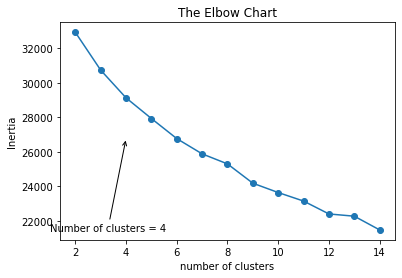

In [15]:

plt.plot(range(2,n_max_clusters), score)
plt.scatter(range(2,n_max_clusters), score)

plt.title('The Elbow Chart')
plt.xlabel('number of clusters')
plt.ylabel('Inertia')

n = 4
plt.annotate(f"Number of clusters = {n}", xy=(n, score[n]), xytext=(n-3, score[n]*0.8), arrowprops=dict(arrowstyle="->"))


plt.show()

In [17]:
# Running the model with number of clusters determined by Elbow MEthod
kmeans = KMeans(n_clusters = n, init="k-means++", random_state=10)
kmeans.fit(StdScale)
only_numeric["Clusters"] = kmeans.labels_

Centroids = pd.DataFrame(scale.inverse_transform(kmeans.cluster_centers_))
Centroids["Clusters"] = [0,1,2,3]

In [18]:
only_numeric.columns

Index(['index', 'pokedex_number', 'generation', 'type_number', 'height_m',
       'weight_kg', 'abilities_number', 'total_points', 'hp', 'attack',
       'defense', 'sp_attack', 'sp_defense', 'speed', 'catch_rate',
       'base_friendship', 'base_experience', 'egg_type_number',
       'percentage_male', 'egg_cycles', 'against_normal', 'against_fire',
       'against_water', 'against_electric', 'against_grass', 'against_ice',
       'against_fight', 'against_poison', 'against_ground', 'against_flying',
       'against_psychic', 'against_bug', 'against_rock', 'against_ghost',
       'against_dragon', 'against_dark', 'against_steel', 'against_fairy',
       'Clusters'],
      dtype='object')

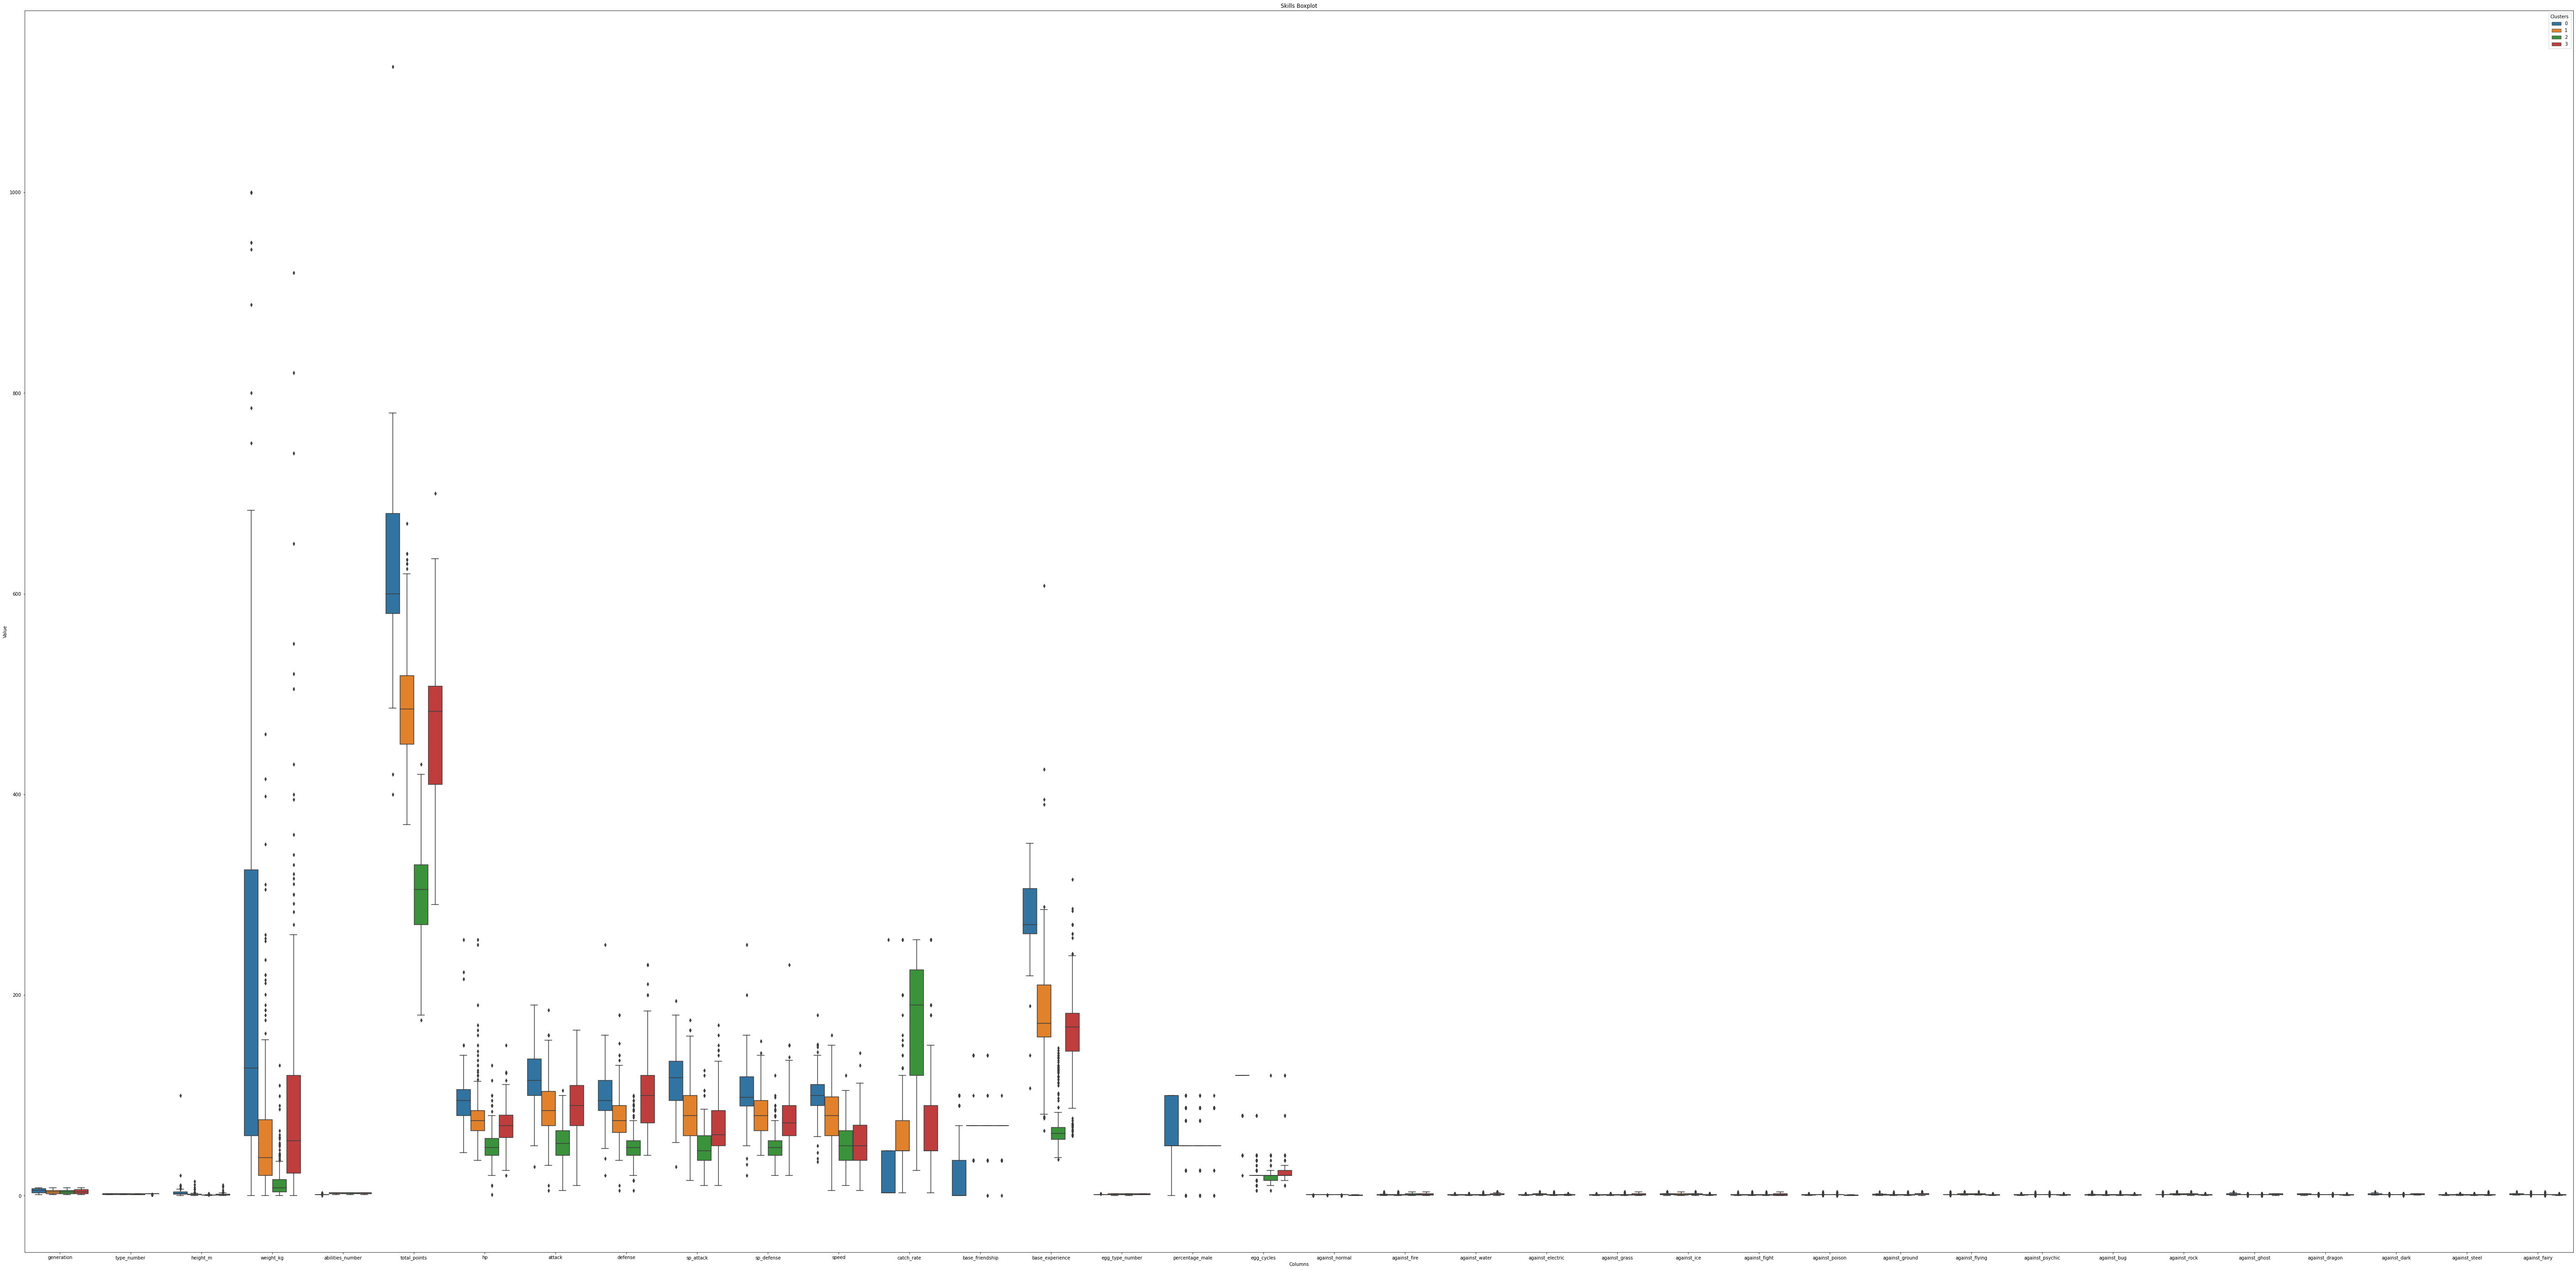

In [19]:
BoxPlotPkdex = pd.melt(only_numeric, id_vars = [
    "index", 
    "Clusters"
    ], value_vars = [
    'generation', 'type_number', 'height_m', 'weight_kg',
       'abilities_number', 'total_points', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'catch_rate', 'base_friendship',
       'base_experience', 'egg_type_number', 'percentage_male', 'egg_cycles',
       'against_normal', 'against_fire', 'against_water', 'against_electric',
       'against_grass', 'against_ice', 'against_fight', 'against_poison',
       'against_ground', 'against_flying', 'against_psychic', 'against_bug',
       'against_rock', 'against_ghost', 'against_dragon', 'against_dark',
       'against_steel', 'against_fairy'   
])
plt.figure(figsize=(100,50))
ax = sns.boxplot(x="variable", y="value", hue = "Clusters", data=BoxPlotPkdex)
plt.title("Skills Boxplot")
plt.xlabel("Columns")
plt.ylabel("Value");
plt.savefig('Numeric values clustering.pdf')

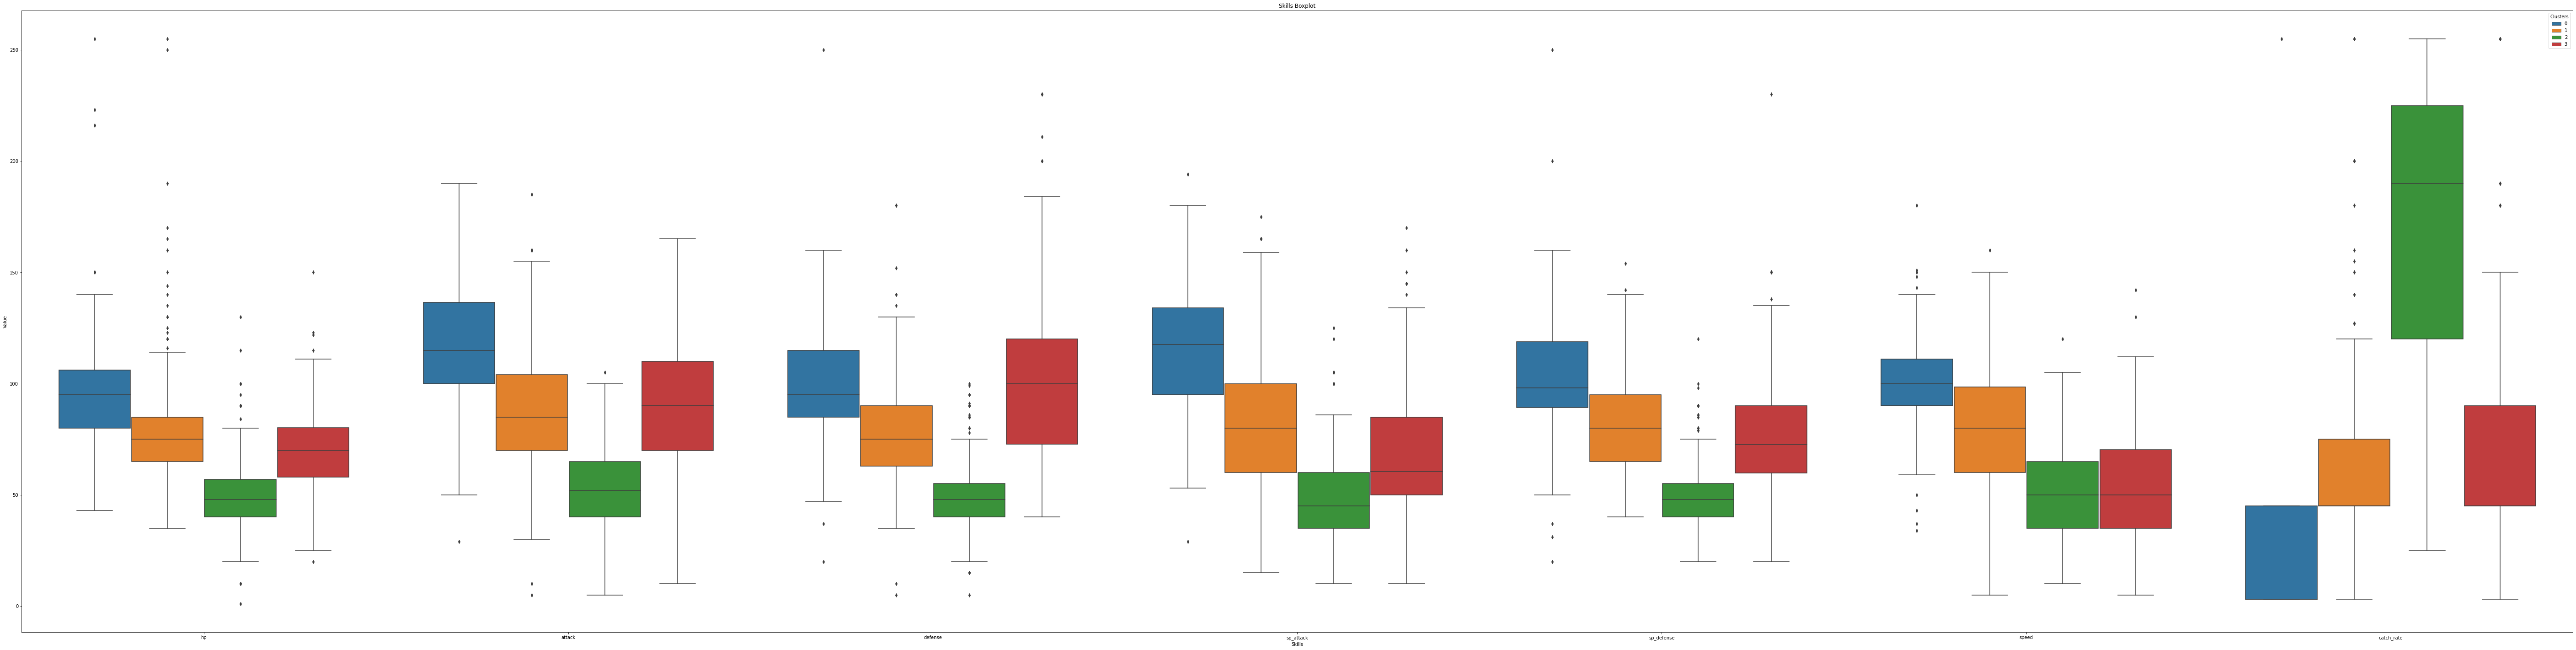

In [20]:
#excluding those mostly 0-1
BoxPlotPkdex = pd.melt(only_numeric, id_vars = [
    "index", 
    "Clusters"
    ], value_vars = [
     'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'catch_rate'
])
plt.figure(figsize=(100,25))
ax = sns.boxplot(x="variable", y="value", hue = "Clusters", data=BoxPlotPkdex)
plt.title("Skills Boxplot")
plt.xlabel("Skills")
plt.ylabel("Value");
plt.savefig('Numeric values clustering Skills four clusters.pdf')

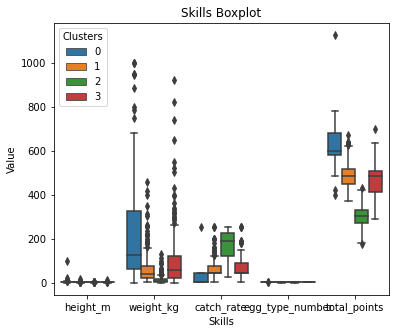

In [21]:
#excluding those mostly 0-1
BoxPlotPkdex = pd.melt(only_numeric, id_vars = [
    "pokedex_number", 
    "Clusters"
    ], value_vars = [
     'height_m', 'weight_kg','catch_rate','egg_type_number','total_points'
])
plt.figure(figsize=(6,5))
ax = sns.boxplot(x="variable", y="value", hue = "Clusters", data=BoxPlotPkdex)
plt.title("Skills Boxplot")
plt.xlabel("Skills")
plt.ylabel("Value");
plt.savefig('Numeric values clustering Physical characteristics and egg four clusters.pdf')

In [22]:
#including those mostly 0-1
only_numeric.groupby("Clusters")[[
     'against_normal', 'against_fire', 'against_water', 'against_electric',
       'against_grass', 'against_ice', 'against_fight', 'against_poison',
       'against_ground', 'against_flying', 'against_psychic', 'against_bug',
       'against_rock', 'against_ghost', 'against_dragon', 'against_dark',
       'against_steel', 'against_fairy'
]].mean()


,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
Clusters,,,,,,,,,,,,,,,,,,
0,0.858491,1.016509,0.922170,0.903302,0.768868,1.488208,0.926887,0.823113,1.000000,1.094340,0.910377,1.016509,1.155660,1.250000,1.188679,1.221698,0.941038,1.325472
1,0.995238,1.095238,0.941667,1.147024,0.894643,1.191964,1.072619,1.147619,0.933929,1.290476,1.015476,1.052976,1.384524,0.892857,0.988095,0.966667,0.947024,1.151786
2,0.941718,1.160276,0.971626,1.065184,0.950153,1.187500,0.988497,1.063650,0.979294,1.259202,1.025307,1.041411,1.278374,0.947853,0.963190,1.047546,0.959356,1.040644
3,0.436080,1.198864,1.551136,0.786932,1.507102,1.048295,1.352273,0.357955,1.690341,0.741477,0.849432,0.742898,0.873580,1.264205,0.840909,1.241477,1.122159,0.862216


## only categorical

In [23]:
only_numeric.groupby('Clusters').pokedex_number.count()

Clusters
0    106
1    420
2    326
3    176
Name: pokedex_number, dtype: int64

In [24]:
only_numeric.columns
categorical_cols=list(set(data.columns) - set(only_numeric.columns))
only_categorical=data[categorical_cols+['pokedex_number']].merge(only_numeric[['index','Clusters']])


MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [143]:
only_categorical.head()

,species,ability_hidden,type_2,german_name,japanese_name,ability_1,ability_2,type_1,egg_type_2,name,status,growth_rate,egg_type_1,pokedex_number,Clusters
0,Seed Pokémon,Chlorophyll,Poison,Bisasam,フシギダネ (Fushigidane),Overgrow,NaN,Grass,Monster,Bulbasaur,Normal,Medium Slow,Grass,1,0
1,Seed Pokémon,Chlorophyll,Poison,Bisaknosp,フシギソウ (Fushigisou),Overgrow,NaN,Grass,Monster,Ivysaur,Normal,Medium Slow,Grass,2,0
2,Seed Pokémon,Chlorophyll,Poison,Bisaflor,フシギバナ (Fushigibana),Overgrow,NaN,Grass,Monster,Venusaur,Normal,Medium Slow,Grass,3,0
3,Seed Pokémon,Chlorophyll,Poison,Bisaflor,フシギバナ (Fushigibana),Overgrow,NaN,Grass,Monster,Venusaur,Normal,Medium Slow,Grass,3,2
4,Seed Pokémon,NaN,Poison,Bisaflor,フシギバナ (Fushigibana),Thick Fat,NaN,Grass,Monster,Mega Venusaur,Normal,Medium Slow,Grass,3,0


In [144]:
#including those mostly 0-1
s=only_categorical.groupby("Clusters")[[
     'growth_rate'
]].value_counts()
s.groupby(level=0).nlargest(1).reset_index(level=0, drop=True)

Clusters  growth_rate
0         Medium Fast     91
1         Medium Fast    110
2         Medium Fast    243
3         Medium Fast    160
4         Slow           179
dtype: int64

## Output


In [25]:
output_cluster=only_numeric[['pokedex_number','index','Clusters']].merge(data[['index','name']])

In [34]:
output_cluster['Clusters']=output_cluster['Clusters'].apply(lambda x: 'Cluster '+str(x))

In [35]:
output_cluster[['pokedex_number','name','Clusters']]

,pokedex_number,name,Clusters
0,1,Bulbasaur,Cluster 2
1,2,Ivysaur,Cluster 1
2,3,Venusaur,Cluster 1
3,3,Mega Venusaur,Cluster 1
4,4,Charmander,Cluster 2
...,...,...,...
1023,888,Zacian Hero of Many Battles,Cluster 0
1024,889,Zamazenta Crowned Shield,Cluster 0
1025,889,Zamazenta Hero of Many Battles,Cluster 0
1026,890,Eternatus,Cluster 0


In [36]:
output_cluster.Clusters.nunique()

4

In [39]:
output_cluster[['pokedex_number','name','Clusters']].to_excel("Pokemon Cluster n=4.xlsx",index=False)

In [40]:
output_cluster[['pokedex_number','name','Clusters']]

,pokedex_number,name,Clusters
0,1,Bulbasaur,Cluster 2
1,2,Ivysaur,Cluster 1
2,3,Venusaur,Cluster 1
3,3,Mega Venusaur,Cluster 1
4,4,Charmander,Cluster 2
...,...,...,...
1023,888,Zacian Hero of Many Battles,Cluster 0
1024,889,Zamazenta Crowned Shield,Cluster 0
1025,889,Zamazenta Hero of Many Battles,Cluster 0
1026,890,Eternatus,Cluster 0
